In [1]:
import numpy as np
import pandas as pd

In [2]:
daily_df = pd.read_parquet(r"D:\stock_prop_shop\.all\data\price_data\daily\daily_data.parquet")

In [3]:
daily_df = daily_df.drop_duplicates(subset=['date', 'order_book_id'])

In [4]:
close_df = pd.pivot(daily_df, index="date", columns="order_book_id", values="close")
open_df = pd.pivot(daily_df, index="date", columns="order_book_id", values="open")

In [5]:
daily_df["money_per_trd"] = daily_df["total_turnover"] / daily_df["num_trades"]
daily_df["ret_pct"] = daily_df.groupby("order_book_id")["close"].pct_change()

In [6]:
overnight_mom = (open_df / close_df.shift(1) -1).rolling(20).sum().shift(1)

In [7]:
(-abs((overnight_mom.T - overnight_mom.quantile(0.9, axis=1)).T)).to_parquet("./overnight_mom_modify.parquet")

In [8]:
import performance as perf
import utils 
import tears
import plotting

In [9]:
ftr_stack = utils.get_clean_factor_and_forward_returns(-abs((overnight_mom.T - overnight_mom.quantile(0.9, axis=1)).T), open_df, quantiles=10, periods=(5,10,20))

Dropped 1.8% entries from factor data: 1.8% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Information Analysis


,5D,10D,20D
IC Mean,0.031,0.038,0.047
IC Std.,0.070,0.072,0.068
IC_IR,0.446,0.533,0.689
t-stat(IC),15.787,18.876,24.411
p-value(IC),0.000,0.000,0.000
IC Skew,-0.575,-0.740,-0.380
IC Kurtosis,1.433,1.682,0.582


c:\Users\41979\Desktop\assignment\utils.py:923: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,5D,10D,20D
Quantile 1 Mean Turnover,0.351,0.519,0.733
Quantile 2 Mean Turnover,0.635,0.762,0.861
Quantile 3 Mean Turnover,0.730,0.820,0.883
Quantile 4 Mean Turnover,0.772,0.844,0.890
Quantile 5 Mean Turnover,0.791,0.852,0.888
Quantile 6 Mean Turnover,0.797,0.855,0.886
Quantile 7 Mean Turnover,0.795,0.852,0.884
Quantile 8 Mean Turnover,0.781,0.843,0.884
Quantile 9 Mean Turnover,0.743,0.812,0.875
Quantile 10 Mean Turnover,0.593,0.733,0.859


,5D,10D,20D
Mean Factor Rank Autocorrelation,0.729,0.522,0.198


<Figure size 640x480 with 0 Axes>

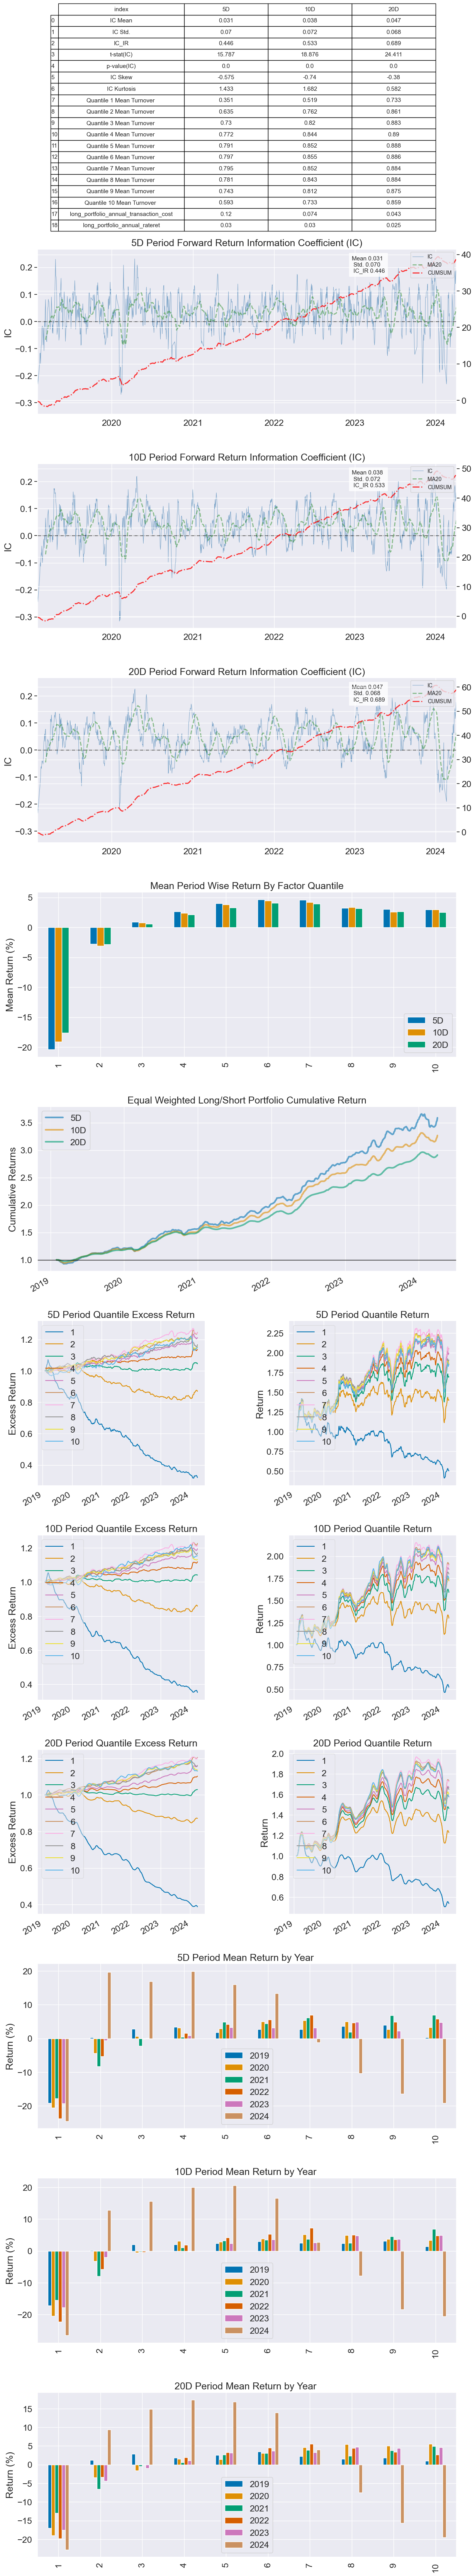

In [10]:
tears.create_summary_tear_sheet(ftr_stack, file_path ="./overnight_mom/")